# Analise temporal de vendas de carros



*Importando Bibliotecas*


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dando inicio a importação do Dataset e Visualização dos dados

In [4]:
carros  =  pd.read_csv('alucar.csv')

In [5]:
carros.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Agora vamos fazer uma análise dos dados

In [6]:
print('Quantidade de dados nulos : ', carros.isna().sum().sum())

Quantidade de dados nulos :  0


In [7]:
print('Quantidade de linhas e colunas :',carros.shape)

Quantidade de linhas e colunas : (24, 2)


In [8]:
carros.dtypes

,0
mes,object
vendas,int64


Alterando a coluna mes de obeject para datetime

In [11]:
carros['mes'] = pd.to_datetime(carros['mes'])

In [12]:
carros['vendas'] =  np.int64(carros['vendas'])

In [13]:
carros.dtypes

,0
mes,datetime64[ns]
vendas,int64


### Foi criado o primeiro Gráfico de Vendas

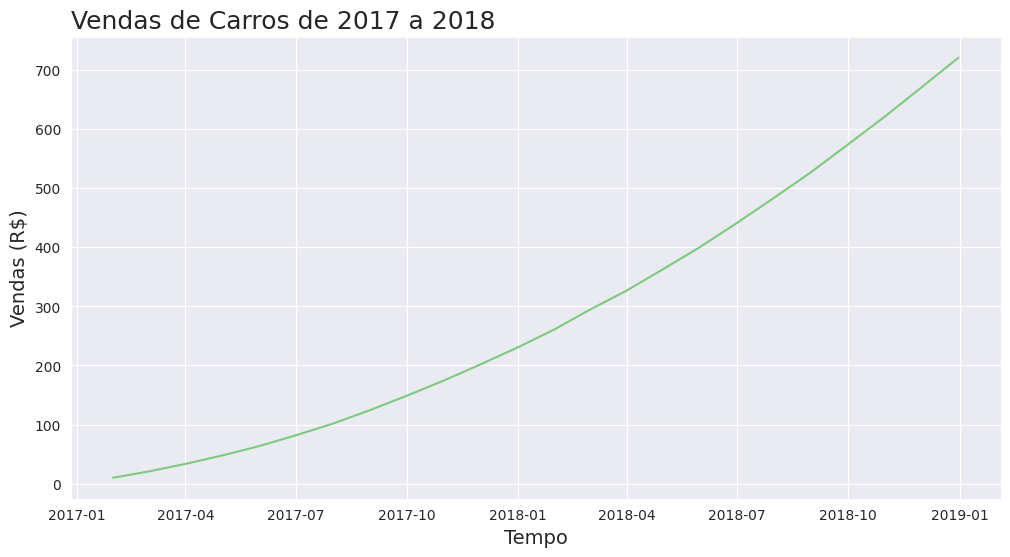

In [57]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= carros)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas de Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [20]:
carros.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


 ### Criamos uma nova feature com o Aumento das vendas

In [22]:
carros['aumento'] = carros['vendas'].diff()
carros.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


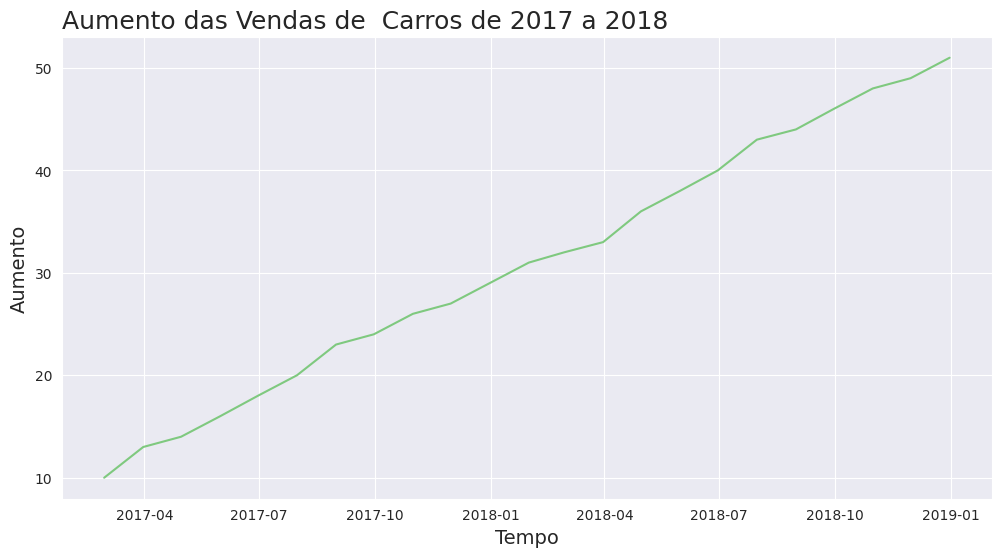

In [58]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data= carros)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das Vendas de  Carros de 2017 a 2018" , loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

### Agora foi criada uma função

In [24]:
def plotar(titulo, labelx,labely, x, y,dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data= dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo , loc = 'left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

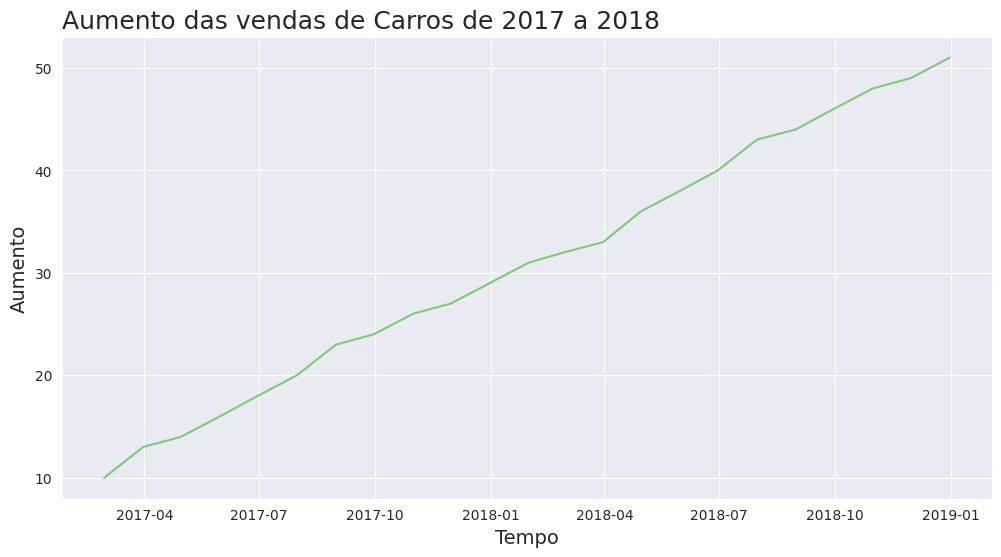

In [59]:
plotar('Aumento das vendas de Carros de 2017 a 2018','Tempo','Aumento',
       'mes','aumento', carros
)

### Criado uma nova feature para ver a Aceleração de vendas

In [28]:
carros['aceleracao'] = carros['aumento'].diff()

In [61]:
carros.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


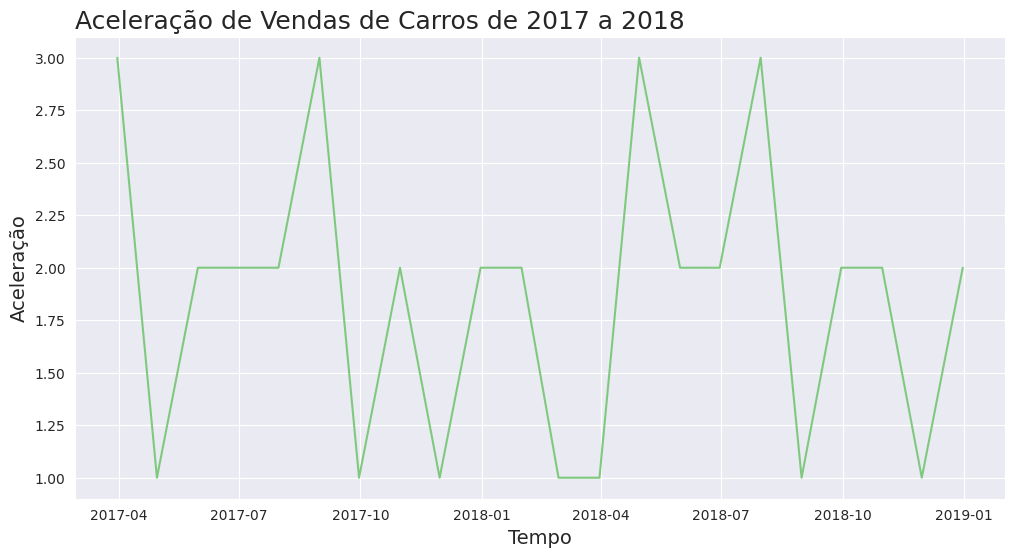

In [60]:
plotar("Aceleração de Vendas de Carros de 2017 a 2018", 'Tempo',
       'Aceleração','mes','aceleracao',carros)

 ## Criamos uma função para mostrar os três graficos juntos

In [33]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize =(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18 , loc ='left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y= y3, data = dataset)

  ax= ax

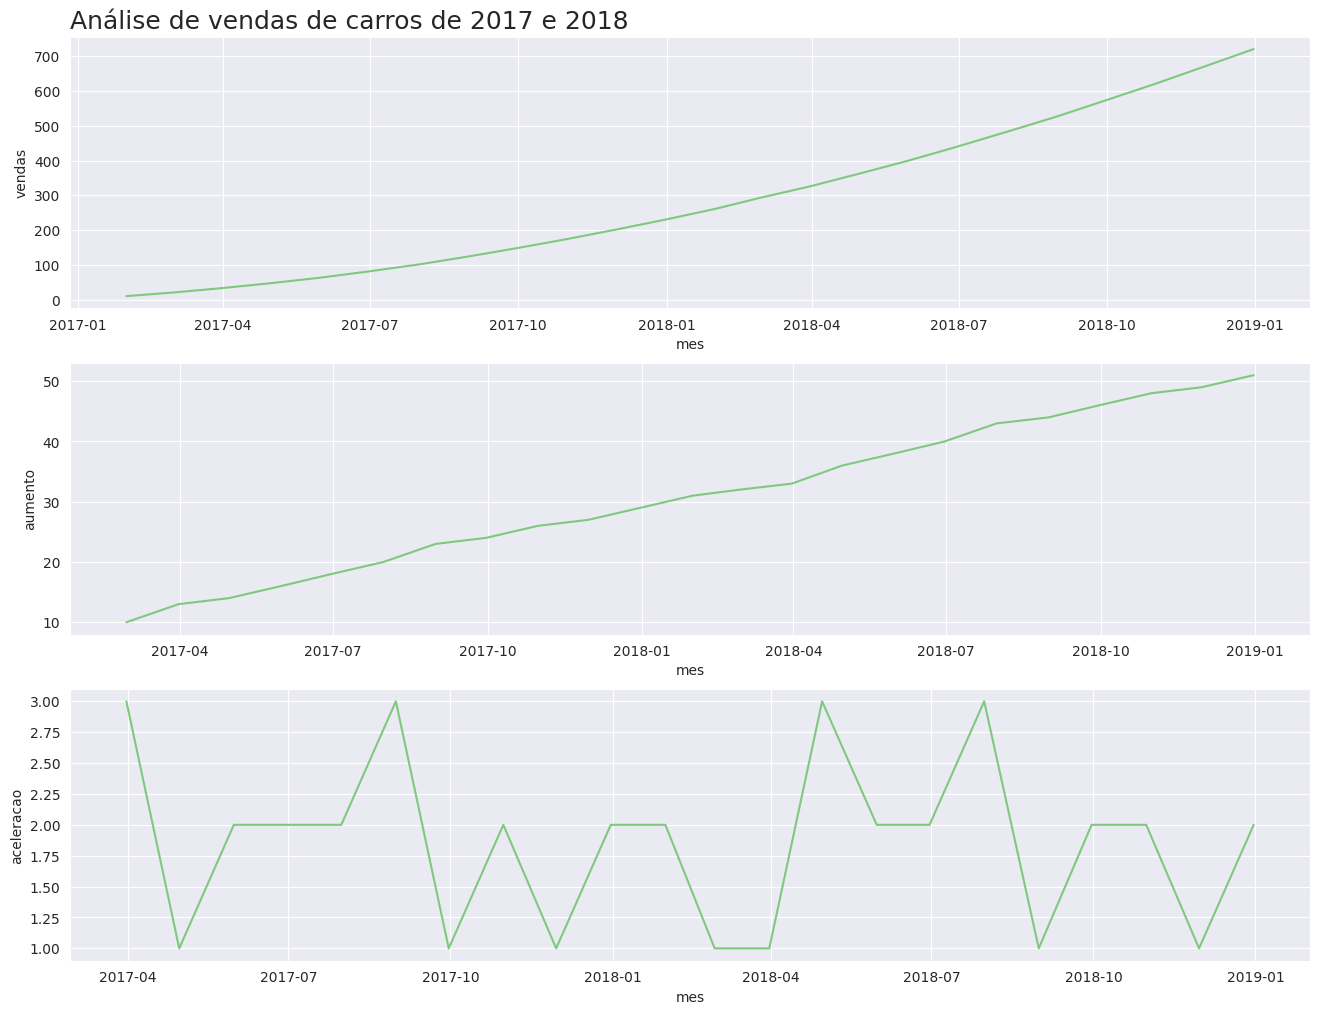

In [35]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                carros,'Análise de Vendas de Carros de 2017 e 2018')


## Agora vamos utilizar o Pandas para fazer a Autocorrelação

In [36]:
from pandas.plotting import autocorrelation_plot

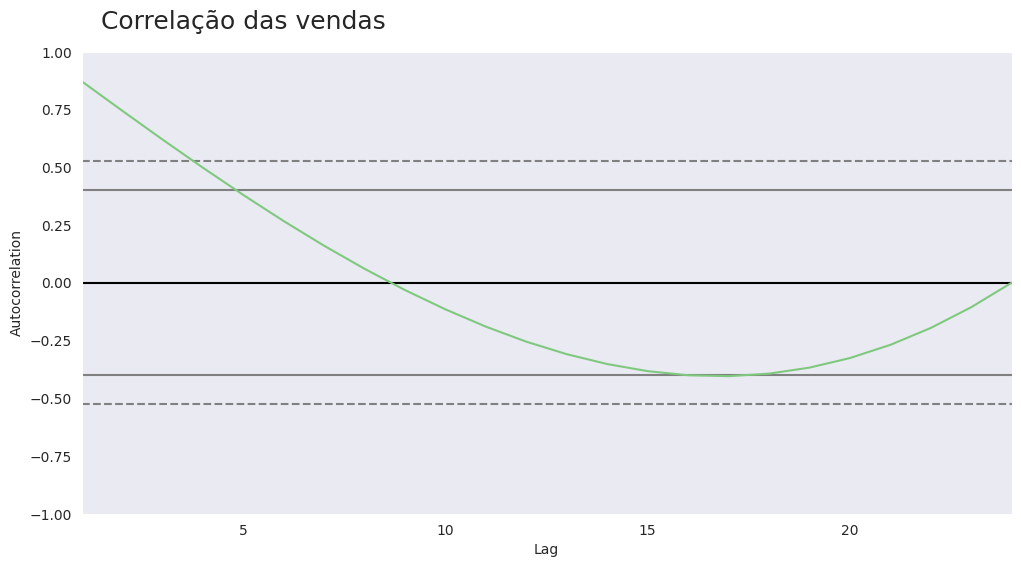

In [49]:
  ax = plt.figure(figsize =(12,6))
  ax.suptitle("Correlação das vendas", fontsize = 18 , x=0.26, y=0.95)
  autocorrelation_plot(carros['vendas'])
  ax = ax

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

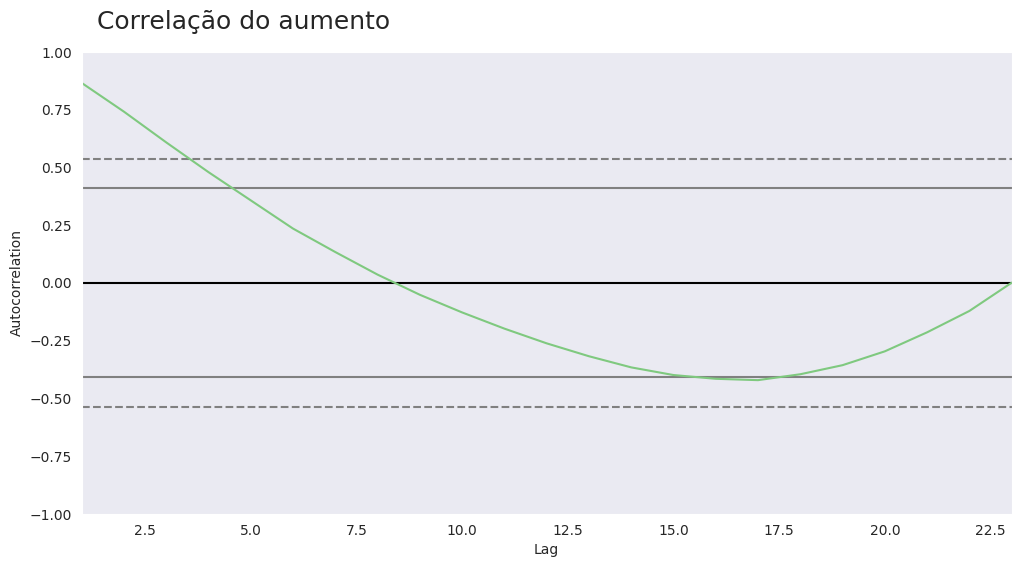

In [51]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação do aumento", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(carros['aumento'][1:])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

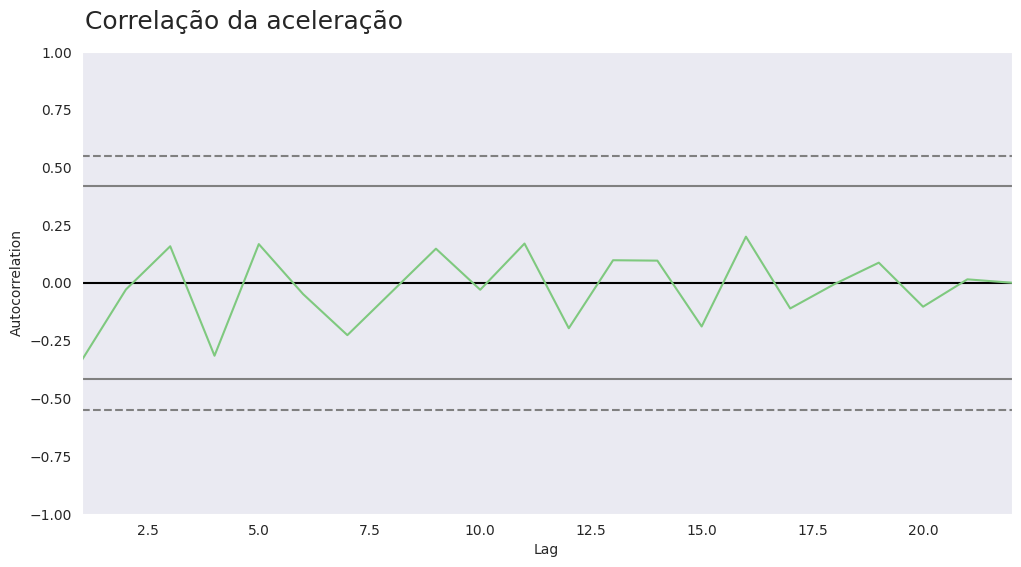

In [53]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação da aceleração", fontsize = 18 , x=0.26, y=0.95)
autocorrelation_plot(carros['aceleracao'][2:])

**Interpretação da autocorrelação**
>
>

**Autocorrelação________________Interpretação**
>       1	              correlação perfeita positiva
>     7 a 0,9       	  correlação forte
>     0,4 a 0,7       	correlação moderada
>     0,2 a 0,4        	correlação fraca
>       0              	correlação nula
>     < 0	              correlação negativa
>      -1	              correlação perfeita negativa